# Q1

In [1]:
import numpy as np
from scipy.signal import convolve2d

def mean_filter_3x3():
    return np.ones((3, 3)) 

def equivalent_filter_3x3_mean_twice():
    mean_filter = mean_filter_3x3()
    equivalent_filter = convolve2d(mean_filter, mean_filter) 
    return equivalent_filter

# Print the equivalent filter
print("Equivalent Filter of 3x3 Mean Filter Applied Twice:")
print(equivalent_filter_3x3_mean_twice())


Equivalent Filter of 3x3 Mean Filter Applied Twice:
[[1. 2. 3. 2. 1.]
 [2. 4. 6. 4. 2.]
 [3. 6. 9. 6. 3.]
 [2. 4. 6. 4. 2.]
 [1. 2. 3. 2. 1.]]


In [2]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('../problem set/image1.jpg', cv2.IMREAD_GRAYSCALE)

# Define the box filters
box_filter_9x9 = np.ones((9, 9), dtype=np.float32) / 81.0
box_filter_3x3_1 = np.ones((3, 3), dtype=np.float32) / 9.0
box_filter_3x3_2 = np.ones((3, 3), dtype=np.float32) / 9.0

# Apply the 9x9 box filter
result_9x9 = cv2.filter2D(image, -1, box_filter_9x9)

# Apply the two 3x3 box filters consecutively
result_3x3_1 = cv2.filter2D(result_9x9, -1, box_filter_3x3_1)
result_final = cv2.filter2D(result_3x3_1, -1, box_filter_3x3_2)




In [ ]:

# Compare and visualize the results
cv2.imshow('Original Image', image)
cv2.imshow('Result (9x9)', result_9x9)
cv2.imshow('Result (3x3 + 3x3)', result_final)
cv2.waitKey(0)
cv2.destroyAllWindows()

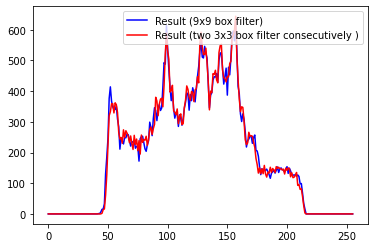

In [5]:
import matplotlib.pyplot as plt

hist_9x9 = cv2.calcHist([result_9x9], [0], None, [256], [0, 256])
hist_final = cv2.calcHist([result_final], [0], None, [256], [0, 256])

plt.plot(hist_9x9, color='blue', label='Result (9x9 box filter)')
plt.plot(hist_final, color='red', label='Result (two 3x3 box filter consecutively )')
plt.legend()
plt.show()


# Q2

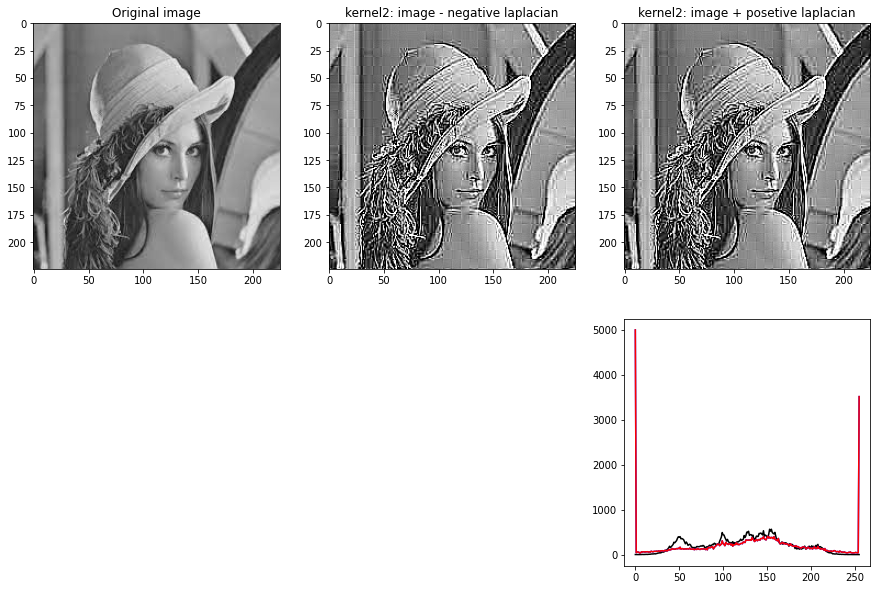

In [61]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Load an image
image = cv2.imread('../problem set/image1.jpg', 0)  # Load in grayscale

# Define the kernels
nlp = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
plp = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

og = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])

kernel1 = og - nlp
kernel2 = og + plp

# Apply the kernels using convolution
output1 = cv2.filter2D(image, -1, kernel1)
output2 = cv2.filter2D(image, -1, kernel2)

# Add results of nlp and plp to the image separately
result_nlp =  cv2.filter2D(image, -1, nlp)
result_plp = cv2.filter2D(image, -1, plp)


# Calculate Histograms
hist_image = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_output1 = cv2.calcHist([output1], [0], None, [256], [0, 256])
hist_output2 = cv2.calcHist([output2], [0], None, [256], [0, 256])

# Plot the results
plt.figure(figsize=(15, 10))

# Original, Kernel 1, Kernel 2
plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original image')
plt.subplot(232), plt.imshow(output1, cmap='gray'), plt.title('kernel2: image - negative laplacian')
plt.subplot(233), plt.imshow(output2, cmap='gray'), plt.title('kernel2: image + posetive laplacian')

# Histograms
plt.subplot(236), plt.plot(hist_image, color='black'), plt.plot(hist_output1, color='blue'), plt.plot(hist_output2, color='red')

plt.show()



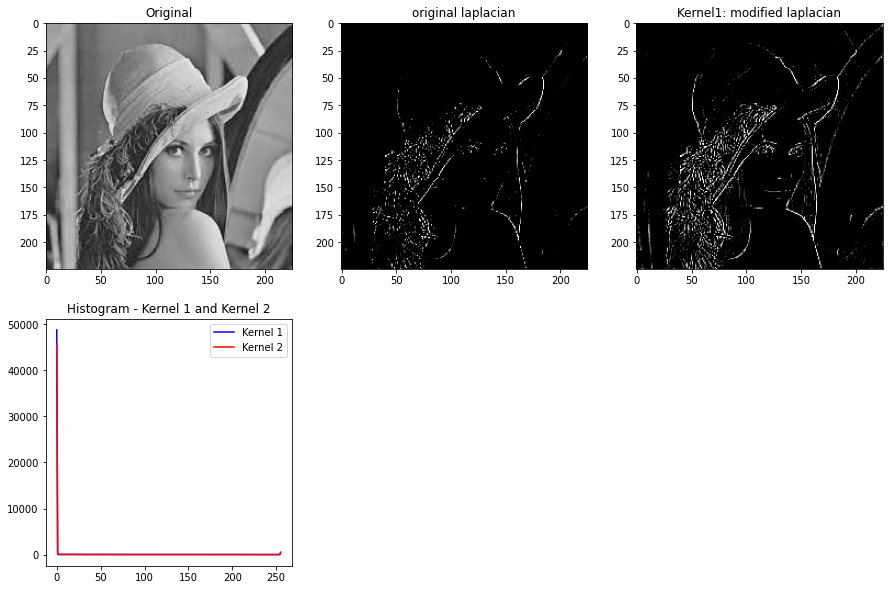

SSIM between Kernel 1 and Kernel 2: 0.7196296553171935
PSNR - Kernel 1: 5.558289258526667
PSNR - Kernel 2: 5.51032933513101
MSE - Kernel 1: 105.23207901234568
MSE - Kernel 2: 105.05684938271605
MAE - Kernel 1: 126.42718024691358
MAE - Kernel 2: 128.66475061728394
Entropy - Kernel 1: 0.48813147863787526
Entropy - Kernel 2: 1.1710929013664053


In [59]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity as ssim
from scipy.stats import entropy

# Load an image
image = cv2.imread('../problem set/image1.jpg', 0)  # Load in grayscale

# Define the kernels
kernel1 = np.array([[1, 1, 1], [1, -11, 1], [1, 1, 1]])
kernel2 = np.array([[1, 1, 1], [1, -9, 1], [1, 1, 1]])

# Apply the kernels using convolution
output1 = cv2.filter2D(image, -1, kernel1)
output2 = cv2.filter2D(image, -1, kernel2)

# Calculate SSIM (Structural Similarity Index)
ssim_index, _ = ssim(output1, output2, full=True)

# Calculate Histograms
hist_output1 = cv2.calcHist([output1], [0], None, [256], [0, 256])
hist_output2 = cv2.calcHist([output2], [0], None, [256], [0, 256])

# Calculate additional metrics
psnr_kernel1 = cv2.PSNR(image, output1)
psnr_kernel2 = cv2.PSNR(image, output2)

mse_kernel1 = np.mean((image - output1) ** 2)
mse_kernel2 = np.mean((image - output2) ** 2)

mae_kernel1 = np.mean(np.abs(image - output1))
mae_kernel2 = np.mean(np.abs(image - output2))

# Calculate entropy using scipy.stats.entropy
entropy_kernel1 = entropy(hist_output1.flatten(), base=2)
entropy_kernel2 = entropy(hist_output2.flatten(), base=2)

# Plot the results
plt.figure(figsize=(15, 10))

# Original, Kernel 1, Kernel 2
plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(232), plt.imshow(output1, cmap='gray'), plt.title('original laplacian')
plt.subplot(233), plt.imshow(output2, cmap='gray'), plt.title('Kernel1: modified laplacian')

# Histograms
plt.subplot(234), plt.plot(hist_output1, color='blue', label='Kernel 1')
plt.plot(hist_output2, color='red', label='Kernel 2'), plt.title('Histogram - Kernel 1 and Kernel 2')
plt.legend()

plt.show()

# Print Metrics
print("SSIM between Kernel 1 and Kernel 2:", ssim_index)
print("PSNR - Kernel 1:", psnr_kernel1)
print("PSNR - Kernel 2:", psnr_kernel2)
print("MSE - Kernel 1:", mse_kernel1)
print("MSE - Kernel 2:", mse_kernel2)
print("MAE - Kernel 1:", mae_kernel1)
print("MAE - Kernel 2:", mae_kernel2)
print("Entropy - Kernel 1:", entropy_kernel1)
print("Entropy - Kernel 2:", entropy_kernel2)


# Q12

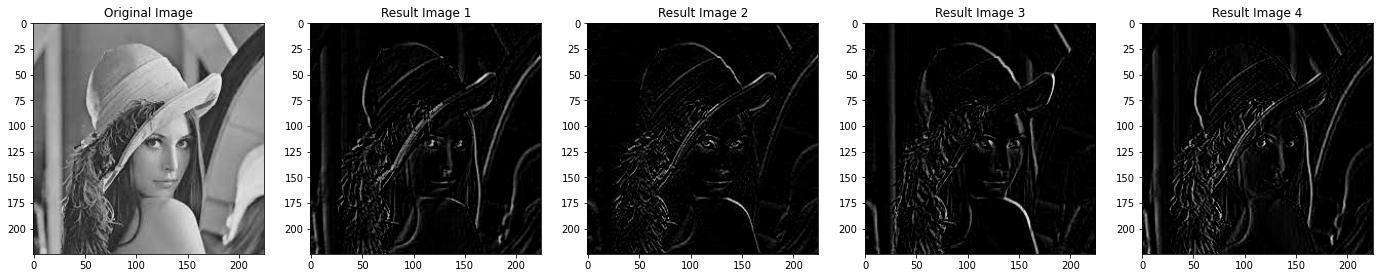

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('../problem set/image1.jpg', cv2.IMREAD_GRAYSCALE)

# Define the kernels
kernels = [
    np.array([[-1, 0, 0], [0, 0, 0], [0, 0, 1]]),
    np.array([[0, -1, 0], [0, 0, 0], [0, 1, 0]]),
    np.array([[0, 0, -1], [0, 0, 0], [1, 0, 0]]),
    np.array([[0, 0, 0], [-1, 0, 1], [0, 0, 0]])
]

# Apply each kernel
result_images = [cv2.filter2D(image, -1, kernel) for kernel in kernels]

# Plot the original and processed images
plt.figure(figsize=(24, 6))

plt.subplot(1, 5, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

for i, result in enumerate(result_images):
    plt.subplot(1, 5, i + 2)
    plt.imshow(result, cmap='gray')
    plt.title(f'Result Image {i+1}')

plt.show()


# Q7

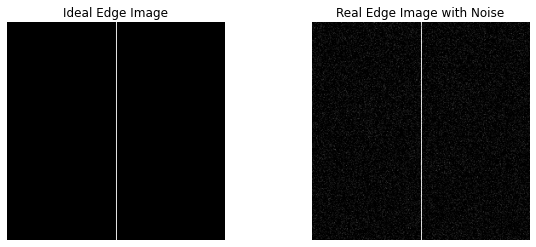

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to create an image with an ideal edge
def create_ideal_edge_image(size=(256, 256), edge_position=128):
    image = np.zeros(size, dtype=np.uint8)
    image[:, edge_position] = 255  # Ideal edge at a specific position
    return image

# Function to add noise to an image
def add_noise(image, noise_factor=20):
    noise = np.random.normal(scale=noise_factor, size=image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

# Create an image with an ideal edge
ideal_edge_image = create_ideal_edge_image()

# Add noise to simulate a real-world scenario
real_edge_image = add_noise(ideal_edge_image)

# Display the images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(ideal_edge_image, cmap='gray')
plt.title('Ideal Edge Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(real_edge_image, cmap='gray')
plt.title('Real Edge Image with Noise')
plt.axis('off')

plt.show()
